# Tech Challenge - Fase 4 

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# arredonda para o inteiro mais próximo
def arredonda_inteiro_mais_proximo(x):
    return np.floor(x + 0.5)

## Importando os dados

In [3]:
df_original  = pd.read_csv("Obesity.csv", sep=",")
df_original.shape

(2111, 17)

In [4]:
df_original.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Tratamento

### Dicionário

In [5]:
data = [

    # Gender
    ("gender", "Sexo biológico", "Female", "Feminino"),
    ("gender", "Sexo biológico", "Male", "Masculino"),

    # family_history
    ("family_history", "Histórico familiar de excesso de peso", "yes", "Há histórico"),
    ("family_history", "Histórico familiar de excesso de peso", "no", "Não há histórico"),

    # FAVC
    ("favc", "Consumo frequente de alimentos altamente calóricos", "yes", "Sim"),
    ("favc", "Consumo frequente de alimentos altamente calóricos", "no", "Não"),

    # FCVC
    ("fcvc", "Frequência de consumo de vegetais nas refeições", 1, "Raramente"),
    ("fcvc", "Frequência de consumo de vegetais nas refeições", 2, "Às vezes"),
    ("fcvc", "Frequência de consumo de vegetais nas refeições", 3, "Sempre"),

    # NCP
    ("ncp", "Número de refeições principais por dia", 1, "Uma refeição"),
    ("ncp", "Número de refeições principais por dia", 2, "Duas refeições"),
    ("ncp", "Número de refeições principais por dia", 3, "Três refeições"),
    ("ncp", "Número de refeições principais por dia", 4, "Quatro ou mais refeições"),

    # CAEC
    ("caec", "Consumo de alimentos entre as refeições", "no", "Não consome"),
    ("caec", "Consumo de alimentos entre as refeições", "Sometimes", "Às vezes"),
    ("caec", "Consumo de alimentos entre as refeições", "Frequently", "Frequentemente"),
    ("caec", "Consumo de alimentos entre as refeições", "Always", "Sempre"),

    # SMOKE
    ("smoke", "Hábito de fumar", "yes", "Fuma"),
    ("smoke", "Hábito de fumar", "no", "Não fuma"),

    # CH2O
    ("ch2o", "Consumo diário de água", 1, "Menos de 1 litro/dia"),
    ("ch2o", "Consumo diário de água", 2, "Entre 1 e 2 litros/dia"),
    ("ch2o", "Consumo diário de água", 3, "Mais de 2 litros/dia"),

    # SCC
    ("scc", "Monitora a ingestão calórica diária", "yes", "Sim"),
    ("scc", "Monitora a ingestão calórica diária", "no", "Não"),

    # FAF
    ("faf", "Frequência semanal de atividade física", 0, "Nenhuma"),
    ("faf", "Frequência semanal de atividade física", 1, "1–2 vezes por semana"),
    ("faf", "Frequência semanal de atividade física", 2, "3–4 vezes por semana"),
    ("faf", "Frequência semanal de atividade física", 3, "5 vezes por semana ou mais"),

    # TUE
    ("tue", "Tempo diário usando dispositivos eletrônicos", 0, "0–2 horas/dia"),
    ("tue", "Tempo diário usando dispositivos eletrônicos", 1, "3–5 horas/dia"),
    ("tue", "Tempo diário usando dispositivos eletrônicos", 2, "Mais de 5 horas/dia"),

    # CALC
    ("calc", "Consumo de bebida alcoólica", "no", "Não bebe"),
    ("calc", "Consumo de bebida alcoólica", "Sometimes", "Às vezes"),
    ("calc", "Consumo de bebida alcoólica", "Frequently", "Frequentemente"),
    ("calc", "Consumo de bebida alcoólica", "Always", "Sempre"),

    # MTRANS
    ("mtrans", "Meio de transporte habitual", "Automobile", "Carro"),
    ("mtrans", "Meio de transporte habitual", "Motorbike", "Moto"),
    ("mtrans", "Meio de transporte habitual", "Bike", "Bicicleta"),
    ("mtrans", "Meio de transporte habitual", "Public_Transportation", "Transporte público"),
    ("mtrans", "Meio de transporte habitual", "Walking", "A pé"),

    # Obesity (target)
    ("obesity", "Nível de obesidade (coluna alvo)", "Insufficient_Weight", "Abaixo do peso"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Normal_Weight", "Peso normal"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Overweight_Level_I", "Sobrepeso nível I"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Overweight_Level_II", "Sobrepeso nível II"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Obesity_Type_I", "Obesidade tipo I"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Obesity_Type_II", "Obesidade tipo II"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Obesity_Type_III", "Obesidade tipo III"),
]

df_dict = pd.DataFrame(
    data,
    columns=["cd_variavel", "ds_variavel", "nr_categoria", "ds_categoria"]
)

# cria a coluna sk_categoria reiniciando em 1 para cada cd_variavel
df_dict["sk_categoria"] = (
    df_dict
    .groupby("cd_variavel")
    .cumcount()
    + 1
)

df_dict

,cd_variavel,ds_variavel,nr_categoria,ds_categoria,sk_categoria
0,gender,Sexo biológico,Female,Feminino,1
1,gender,Sexo biológico,Male,Masculino,2
2,family_history,Histórico familiar de excesso de peso,yes,Há histórico,1
3,family_history,Histórico familiar de excesso de peso,no,Não há histórico,2
4,favc,Consumo frequente de alimentos altamente calór...,yes,Sim,1
5,favc,Consumo frequente de alimentos altamente calór...,no,Não,2
6,fcvc,Frequência de consumo de vegetais nas refeições,1,Raramente,1
7,fcvc,Frequência de consumo de vegetais nas refeições,2,Às vezes,2
8,fcvc,Frequência de consumo de vegetais nas refeições,3,Sempre,3
9,ncp,Número de refeições principais por dia,1,Uma refeição,1


### Pesquisa

In [6]:
df = df_original.copy()

# transformando o nome das colunas em minúsculo
df.columns = df.columns.str.lower()

df.head()

,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
print("Total de nulos: ", df.isnull().sum().sum())

Total de nulos:  0


In [8]:
df.nunique()

gender               2
age               1402
height            1574
weight            1525
family_history       2
favc                 2
fcvc               810
ncp                635
caec                 4
smoke                2
ch2o              1268
scc                  2
faf               1190
tue               1129
calc                 4
mtrans               5
obesity              7
dtype: int64

In [9]:
# conversões e arredondamentos

df['age'] = df['age'].astype(int)

for c in ['fcvc', 'ncp', 'ch2o', 'faf', 'tue']:
    df[c] = arredonda_inteiro_mais_proximo(df[c]).astype(int)

df['height'] = round(df['height'] * 100, 0).astype(int) # centímetros
df['weight'] = df['weight'].round(3) # kilogramas

In [10]:
# cria um dicionário de dicionários
mapas = (
    df_dict
    .groupby("cd_variavel")[["nr_categoria", "sk_categoria"]]
    .apply(lambda x: dict(zip(x["nr_categoria"], x["sk_categoria"])))
    .to_dict()
)

In [11]:
# compila o dicionário com o dataset
df_encoded = df.copy()

for col in df_encoded.columns:
    if col in mapas:
        df_encoded[col] = df_encoded[col].map(mapas[col])

In [12]:
# verifica se há valores no dataset que não existem no dicionário.
colunas_com_problema = [
    col for col in mapas
    if col in df_encoded.columns and df_encoded[col].isna().any()
]

colunas_com_problema

[]

In [13]:
df_encoded

,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity
0,1,21,162,64.000,1,2,2,3,2,2,2,2,1,2,1,4,2
1,1,21,152,56.000,1,2,3,3,2,1,3,1,4,1,2,4,2
2,2,23,180,77.000,1,2,2,3,2,2,2,2,3,2,3,4,2
3,2,27,180,87.000,2,2,3,3,2,2,2,2,3,1,3,5,3
4,2,22,178,89.800,2,2,2,1,2,2,2,2,1,1,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,171,131.409,1,1,3,3,2,2,2,2,3,2,2,4,7
2107,1,21,175,133.743,1,1,3,3,2,2,2,2,2,2,2,4,7
2108,1,22,175,133.689,1,1,3,3,2,2,2,2,2,2,2,4,7
2109,1,24,174,133.347,1,1,3,3,2,2,3,2,2,2,2,4,7


## Análise e Exploração dos Dados

### Histograma

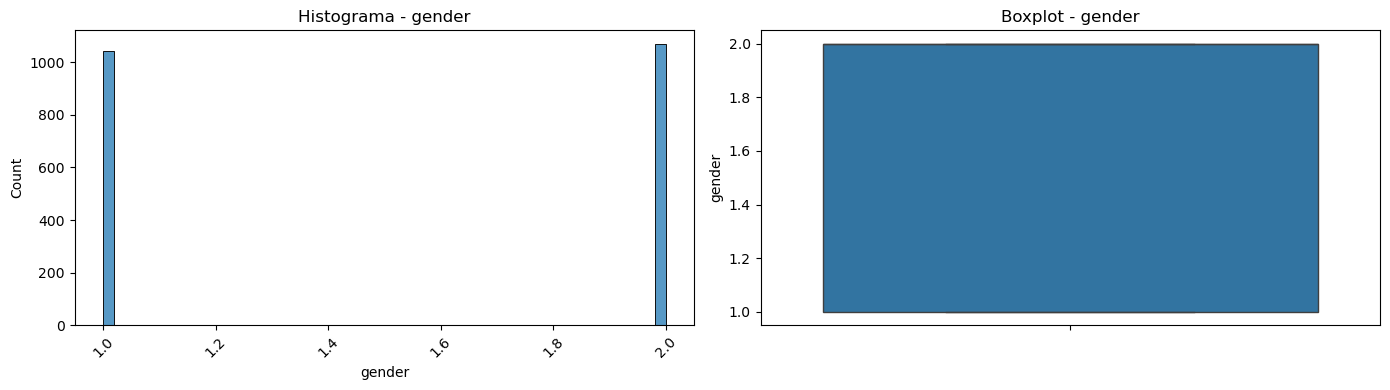

['Sexo biológico']
   sk_categoria ds_categoria
0             1     Feminino
1             2    Masculino


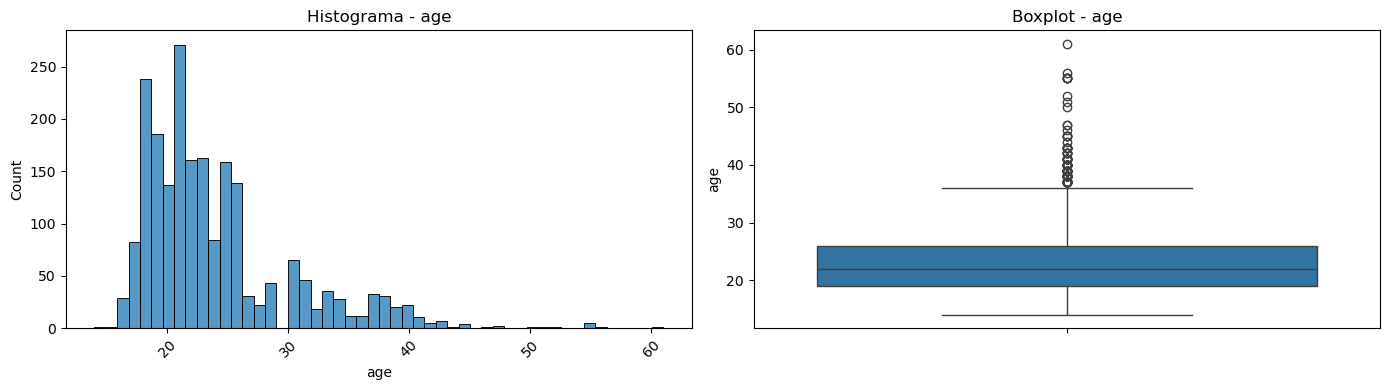

[]
Empty DataFrame
Columns: [sk_categoria, ds_categoria]
Index: []


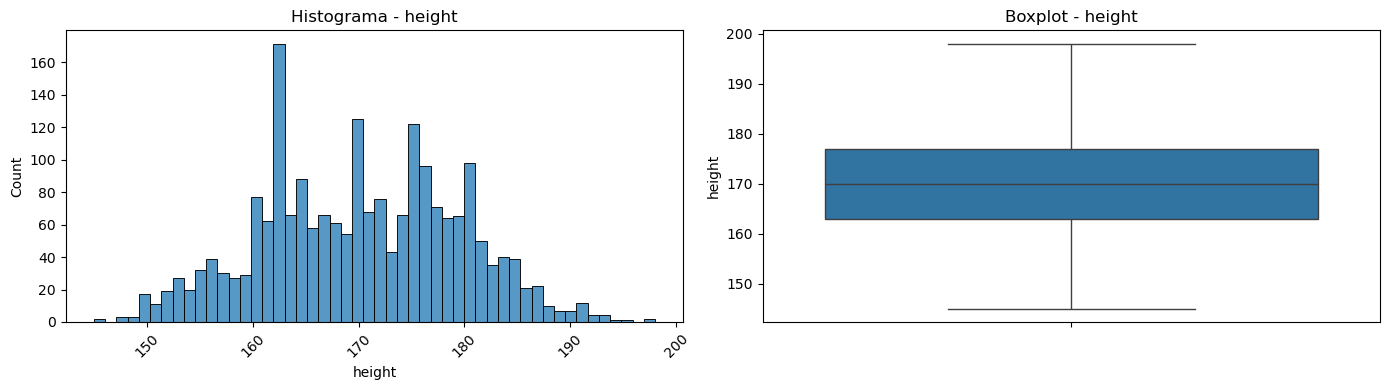

[]
Empty DataFrame
Columns: [sk_categoria, ds_categoria]
Index: []


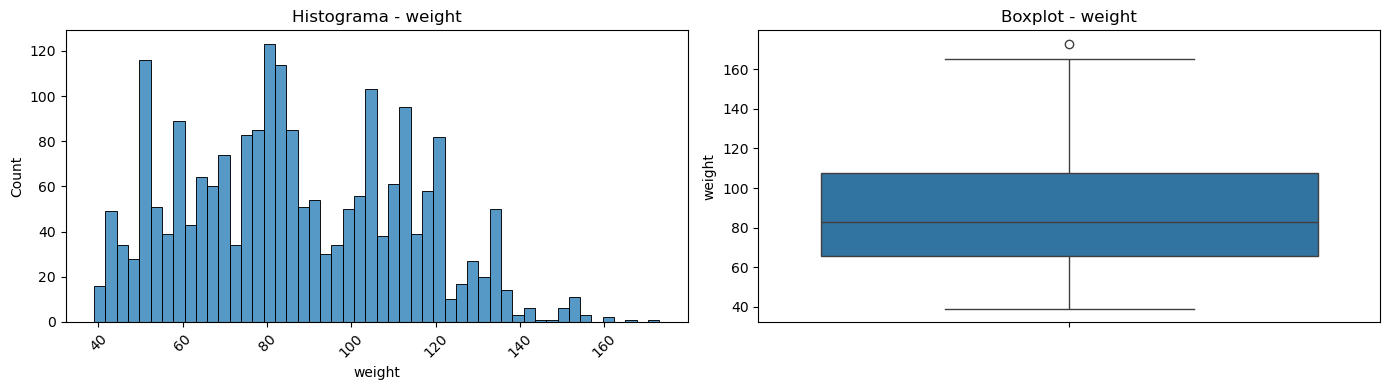

[]
Empty DataFrame
Columns: [sk_categoria, ds_categoria]
Index: []


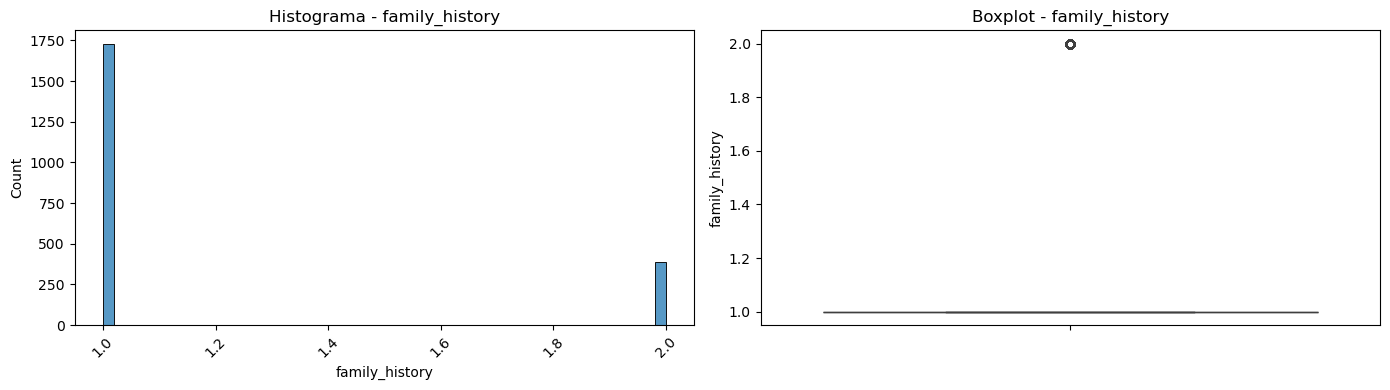

['Histórico familiar de excesso de peso']
   sk_categoria      ds_categoria
2             1      Há histórico
3             2  Não há histórico


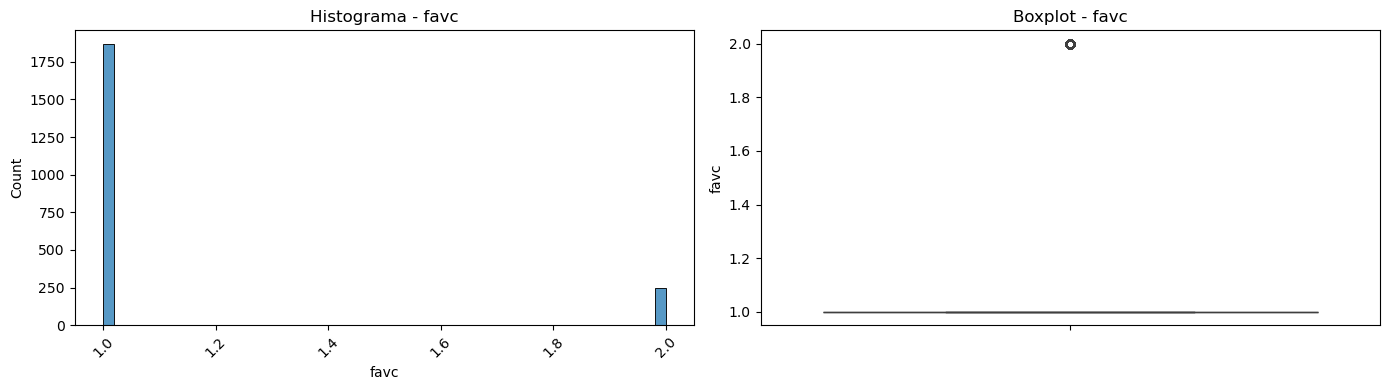

['Consumo frequente de alimentos altamente calóricos']
   sk_categoria ds_categoria
4             1          Sim
5             2          Não


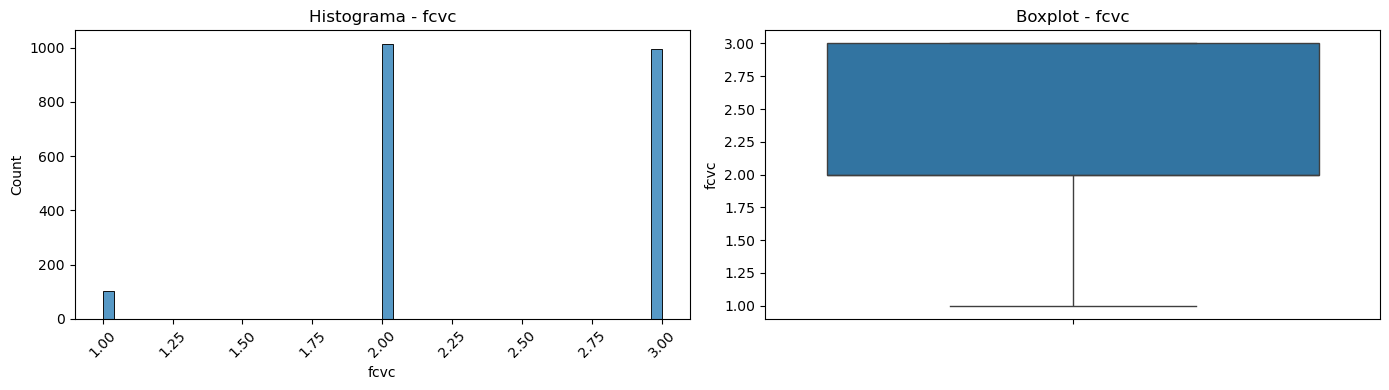

['Frequência de consumo de vegetais nas refeições']
   sk_categoria ds_categoria
6             1    Raramente
7             2     Às vezes
8             3       Sempre


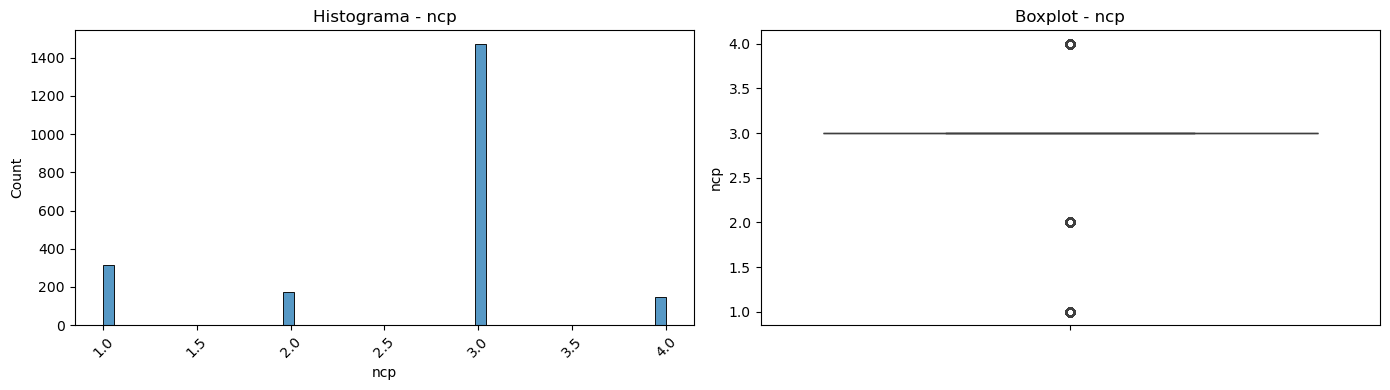

['Número de refeições principais por dia']
    sk_categoria              ds_categoria
9              1              Uma refeição
10             2            Duas refeições
11             3            Três refeições
12             4  Quatro ou mais refeições


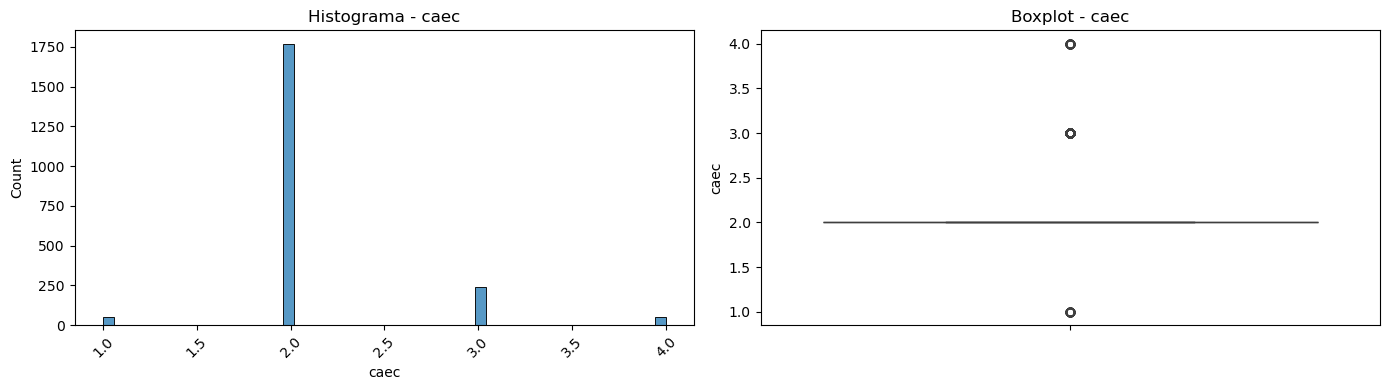

['Consumo de alimentos entre as refeições']
    sk_categoria    ds_categoria
13             1     Não consome
14             2        Às vezes
15             3  Frequentemente
16             4          Sempre


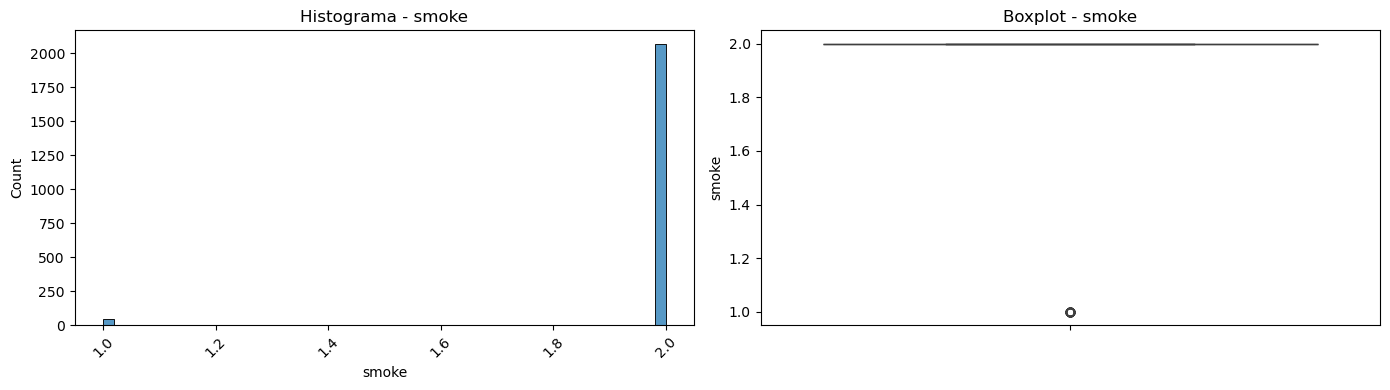

['Hábito de fumar']
    sk_categoria ds_categoria
17             1         Fuma
18             2     Não fuma


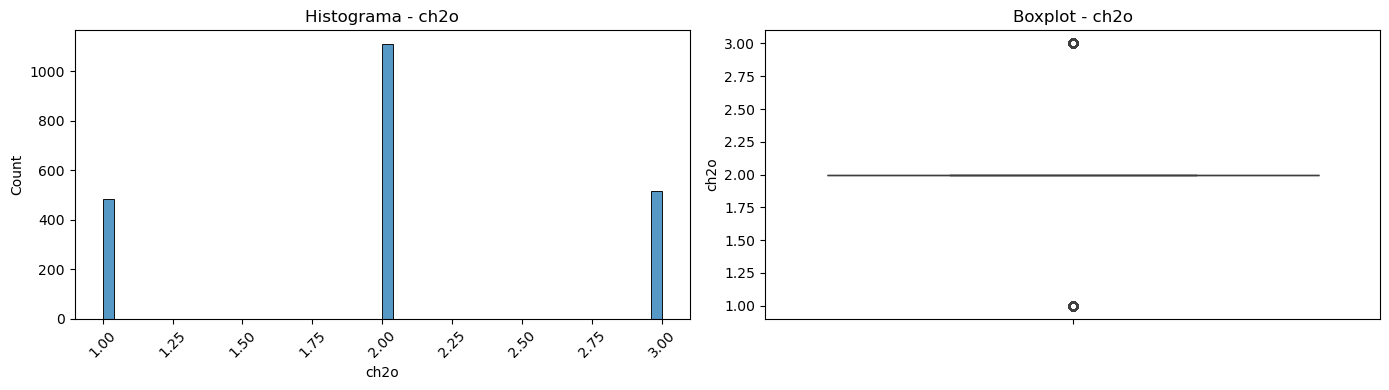

['Consumo diário de água']
    sk_categoria            ds_categoria
19             1    Menos de 1 litro/dia
20             2  Entre 1 e 2 litros/dia
21             3    Mais de 2 litros/dia


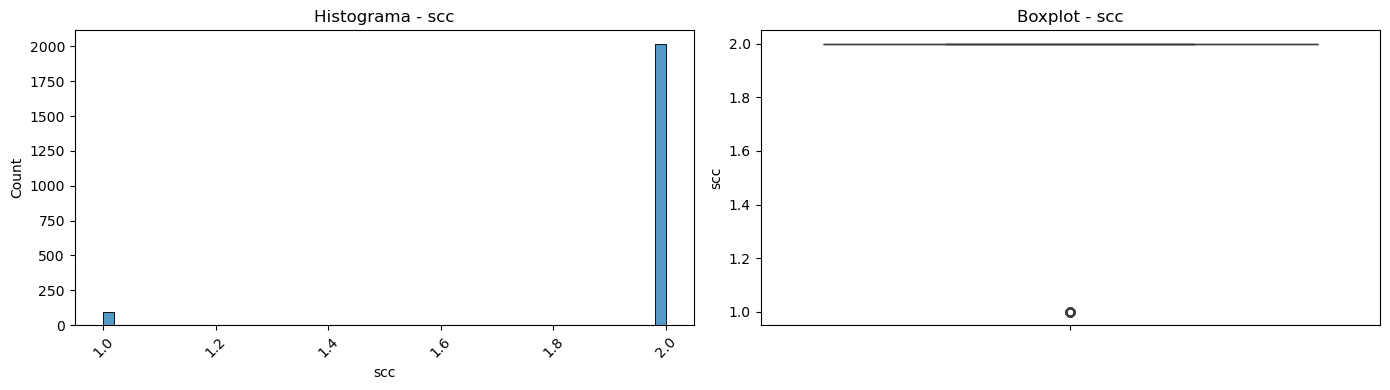

['Monitora a ingestão calórica diária']
    sk_categoria ds_categoria
22             1          Sim
23             2          Não


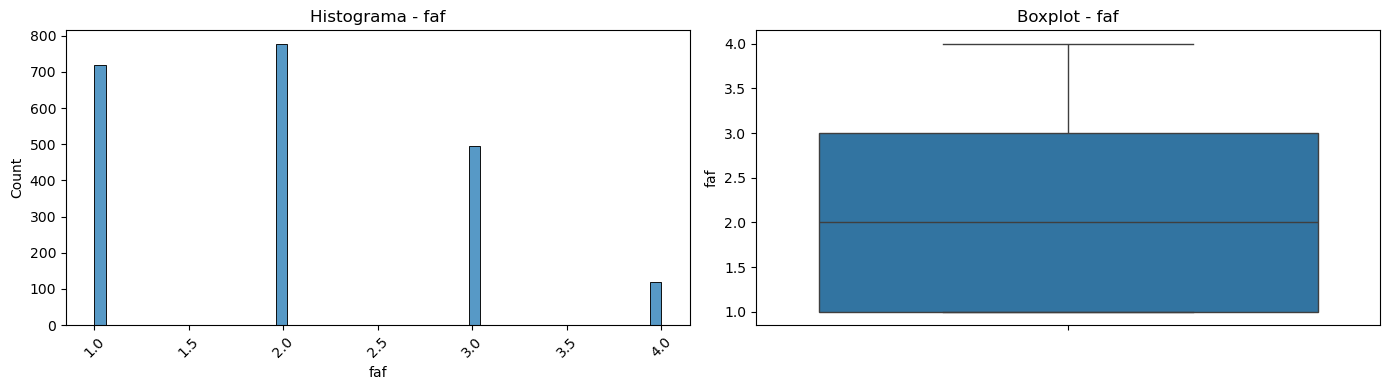

['Frequência semanal de atividade física']
    sk_categoria                ds_categoria
24             1                     Nenhuma
25             2        1–2 vezes por semana
26             3        3–4 vezes por semana
27             4  5 vezes por semana ou mais


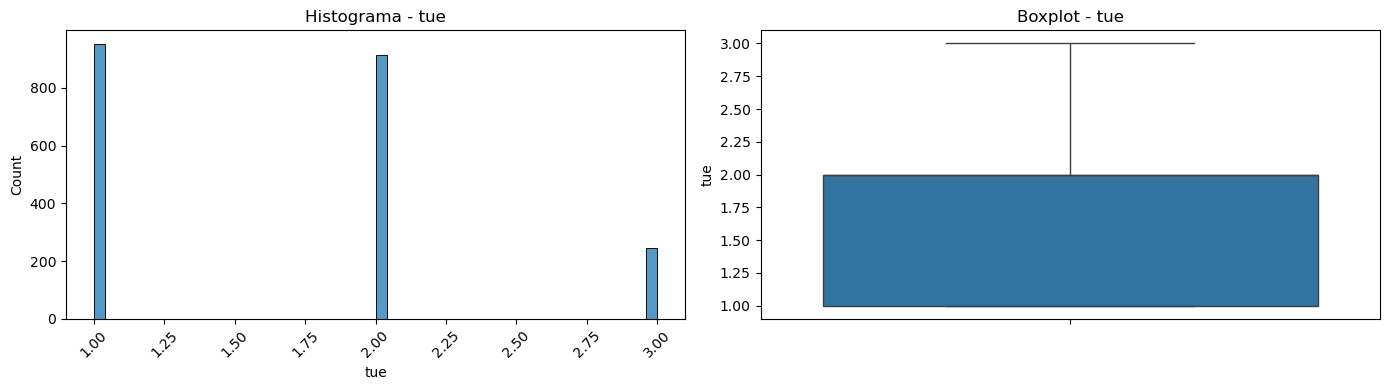

['Tempo diário usando dispositivos eletrônicos']
    sk_categoria         ds_categoria
28             1        0–2 horas/dia
29             2        3–5 horas/dia
30             3  Mais de 5 horas/dia


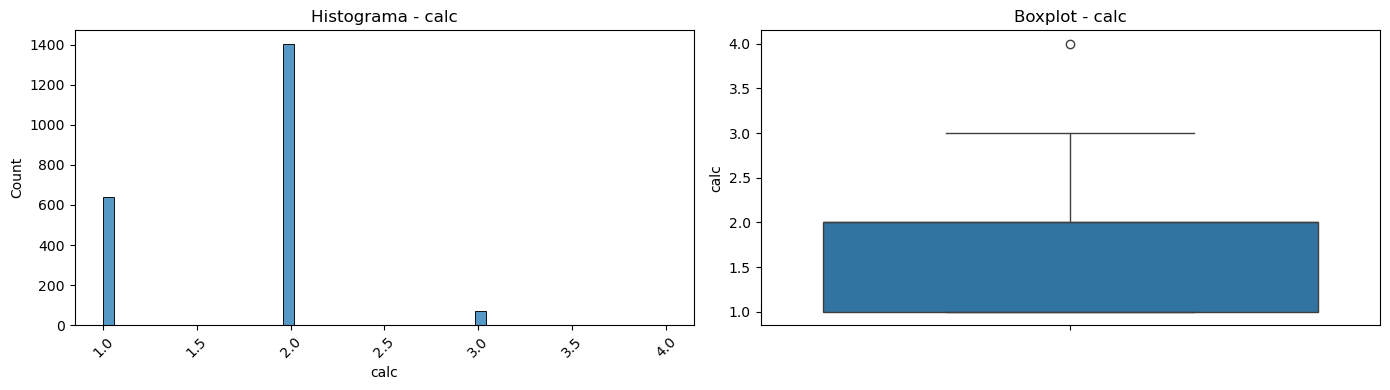

['Consumo de bebida alcoólica']
    sk_categoria    ds_categoria
31             1        Não bebe
32             2        Às vezes
33             3  Frequentemente
34             4          Sempre


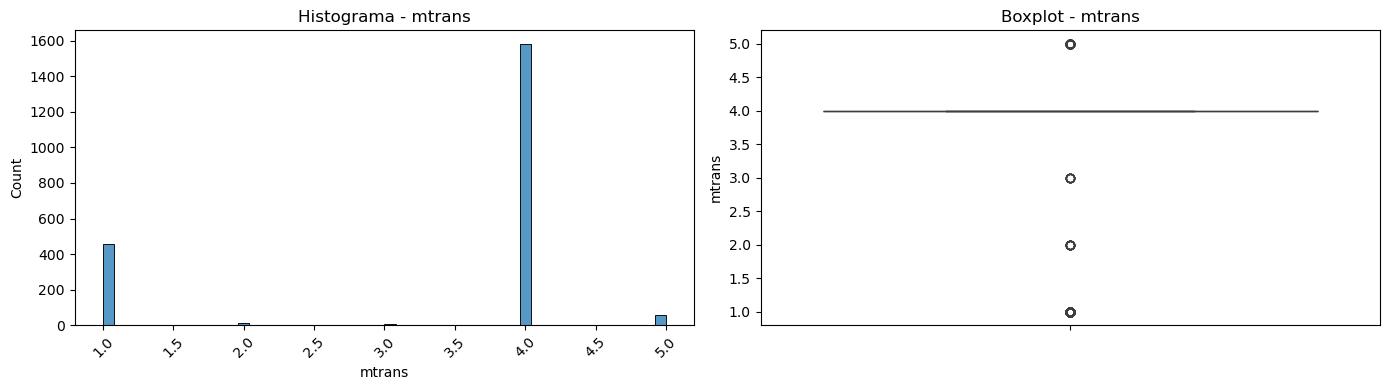

['Meio de transporte habitual']
    sk_categoria        ds_categoria
35             1               Carro
36             2                Moto
37             3           Bicicleta
38             4  Transporte público
39             5                A pé


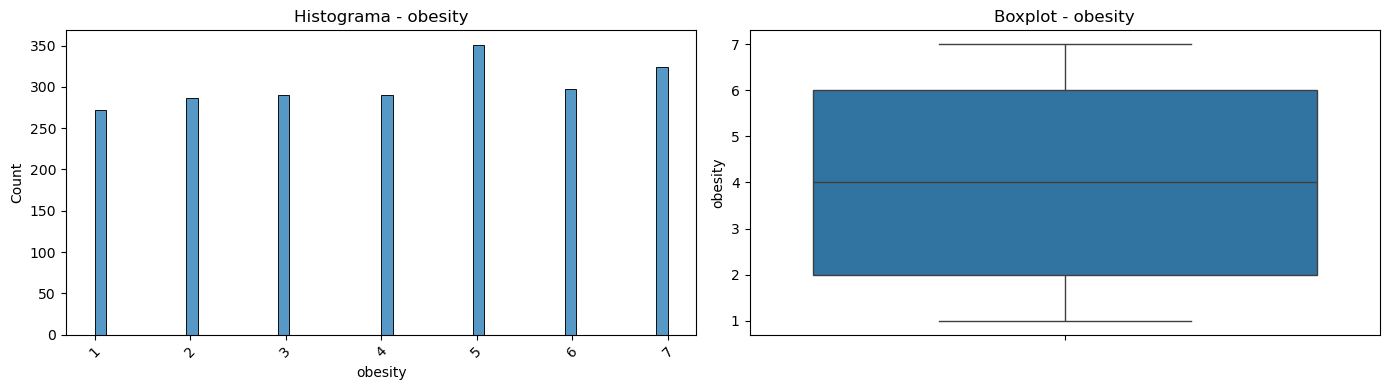

['Nível de obesidade (coluna alvo)']
    sk_categoria        ds_categoria
40             1      Abaixo do peso
41             2         Peso normal
42             3   Sobrepeso nível I
43             4  Sobrepeso nível II
44             5    Obesidade tipo I
45             6   Obesidade tipo II
46             7  Obesidade tipo III


In [245]:
for c in df_encoded.columns:

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Histograma
    sns.histplot(
        data=df_encoded,
        x=c,
        bins=50,
        ax=axes[0]
    )
    axes[0].set_title(f"Histograma - {c}")
    axes[0].tick_params(axis="x", rotation=45)

    # Boxplot
    sns.boxplot(
        data=df_encoded,
        y=c,
        ax=axes[1]
    )
    axes[1].set_title(f"Boxplot - {c}")

    plt.tight_layout()
    plt.show()

    # Informações do dicionário
    print(df_dict.loc[df_dict["cd_variavel"] == c]["ds_variavel"].unique())
    print(df_dict.loc[df_dict["cd_variavel"] == c][["sk_categoria", "ds_categoria"]])

### Correlação

<Axes: >

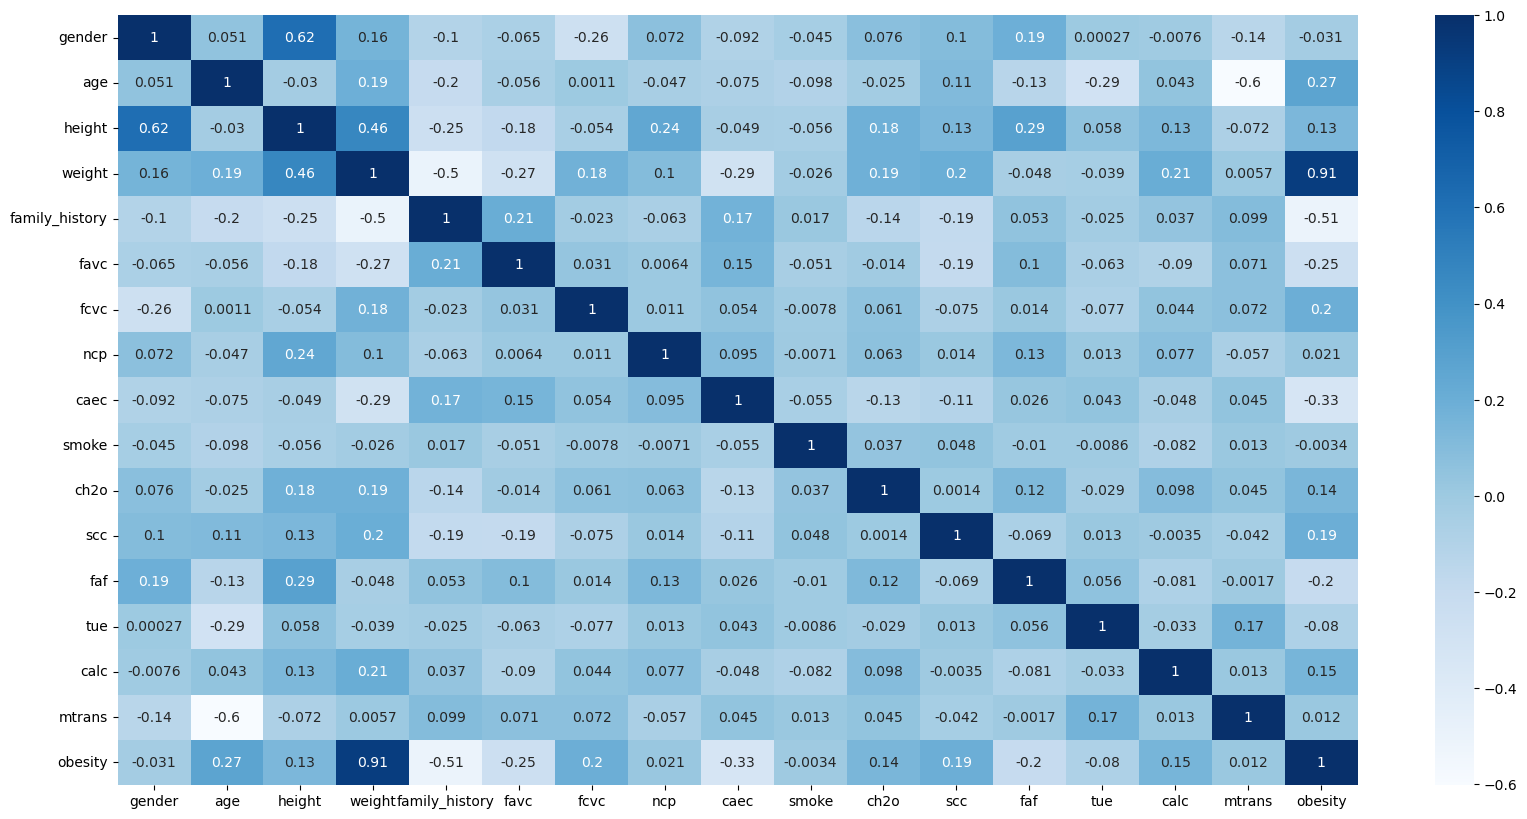

In [243]:
corr = df_encoded.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap="Blues", annot=True)